# Langkah 1 - Import Library

In [48]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import GlobalAveragePooling1D
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Langkah 2 - Memuat Dataset

In [49]:
# Step 2: Load Dataset
max_words = 10000  # Only consider the top 10,000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [50]:
# Step 3: Decode reviews
word_index = imdb.get_word_index()
index_word = {index + 3: word for word, index in word_index.items()}  # Adjust index for padding
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'  # Unknown
index_word[3] = '<UNUSED>'

# Function to decode reviews
def decode_review(encoded_review):
    return ' '.join([index_word.get(i, '?') for i in encoded_review])

# Step 4: Create a DataFrame for the first 10 samples
data = {
    'Review': [decode_review(x_train[i]) for i in range(10)],
    'Label': [y_train[i] for i in range(10)]
}

df = pd.DataFrame(data)

# Step 5: Display the first 10 samples using head()
print(df.head(10))

                                              Review  Label
0  <START> this film was just brilliant casting l...      1
1  <START> big hair big boobs bad music and a gia...      0
2  <START> this has to be one of the worst films ...      0
3  <START> the <UNK> <UNK> at storytelling the tr...      1
4  <START> worst mistake of my life br br i picke...      0
5  <START> begins better than it ends funny that ...      0
6  <START> lavish production values and solid per...      1
7  <START> the <UNK> tells the story of the four ...      0
8  <START> just got out and cannot believe what a...      1
9  <START> this movie has many problem associated...      0


# Langkah 3 - Preprocessing Data (Padding)

In [51]:

max_len = 500  # Pad or truncate reviews to this length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [55]:
# Menggunakan SMOTE untuk mengatasi class imbalance

from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Langkah 4 - Membangun Sequential Model

In [59]:

model = Sequential([
    Embedding(max_words, 32), # Embedding layer
    GlobalAveragePooling1D(),  # Global Pooling
    Dense(16, activation ='relu', input_dim=(x_train_resampled.shape[1])),
    Dense(8, activation ='relu'),
    Dense(1, activation='sigmoid')
])


# Langkah 5 - Compile Model

In [60]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Latih Model dengan class_weight
class_weights = {0: 1, 1: 3}  # Class weight untuk menangani imbalance

# Langkah 6 - Train Model dengan Fungsi Callbacks

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train model with callbacks
history = model.fit(
    x_train_resampled, y_train_resampled,
    epochs=10,
    batch_size=32,
    class_weight=class_weights,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=monitor
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.5004 - loss: 1.1454 - val_accuracy: 0.7351 - val_loss: 0.5602
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6875 - loss: 0.7810 - val_accuracy: 0.8532 - val_loss: 0.3589
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8026 - loss: 0.5959 - val_accuracy: 0.7489 - val_loss: 0.5333
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8535 - loss: 0.4715 - val_accuracy: 0.8726 - val_loss: 0.3153
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8698 - loss: 0.4313 - val_accuracy: 0.8722 - val_loss: 0.3081
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8802 - loss: 0.4115 - val_accuracy: 0.7977 - val_loss: 0.4800
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8823 - loss: 0.3998 - val_accuracy: 0.8861 - val_loss: 0.2859
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.8990 - loss: 0.3588 - va

Berdasarkan hasil pelatihan model yang kamu berikan, berikut adalah analisis singkat untuk setiap epoch:


Epoch 1-2:

- Akurasi Training: Mulai dari 50% di epoch 1 dan meningkat menjadi 68.75% di epoch 2.
- Akurasi Validasi: Dimulai dengan 73.51% dan meningkat tajam menjadi 85.32%.
- Loss: Baik training maupun validasi menunjukkan penurunan yang signifikan, yang merupakan tanda model belajar dengan baik dari awal.

Epoch 3-4:

- Akurasi Training: Meningkat terus hingga 80.26% di epoch 3 dan 85.35% di epoch 4.
- Akurasi Validasi: Mengalami sedikit fluktuasi pada epoch 3 (74.89%), tetapi kembali meningkat menjadi 87.26% di epoch 4.
- Loss: Model secara konsisten menurunkan training loss, dan validasi loss juga menunjukkan perbaikan.

Epoch 5-6:

- Akurasi Training: Stabil di sekitar 87-88%, menunjukkan peningkatan, tapi lebih lambat dibanding epoch sebelumnya.
- Akurasi Validasi: Mengalami sedikit penurunan pada epoch 6 (79.77%), mungkin menunjukkan fluktuasi karena kompleksitas data atau model.
- Loss Validasi: Pada epoch 6, validasi loss meningkat, menunjukkan bahwa model mulai kehilangan performa sedikit pada data validasi.

Epoch 7-8:

- Akurasi Training: Terus meningkat, mencapai 89.90% pada epoch 8.
- Akurasi Validasi: Kembali meningkat ke sekitar 88.61% dan 88.84%, menunjukkan pemulihan performa pada data validasi.
- Loss Validasi: Menurun cukup stabil, menunjukkan peningkatan generalisasi.

Epoch 9-10:

- Akurasi Training: Model terus meningkat hingga 91.01%.
- Akurasi Validasi: Akurasi validasi tetap tinggi, tetapi sedikit menurun di akhir, menjadi 86.90%.
- Loss Validasi: Di akhir, validasi loss sedikit meningkat, yang dapat menjadi indikasi model mulai overfitting di epoch terakhir.


Kesimpulan:
- Training Accuracy meningkat secara konsisten dari 50.04% hingga 91.01%, menunjukkan bahwa model belajar dengan baik pada data pelatihan.
- Validation Accuracy stabil di sekitar 86-88%, dengan sedikit fluktuasi, tetapi masih sangat dekat dengan training accuracy. Ini menunjukkan generalisasi yang baik, meskipun ada sedikit penurunan di epoch terakhir.
- Validation Loss juga stabil dengan sedikit peningkatan di akhir, yang mungkin mengindikasikan overfitting ringan pada epoch terakhir.

# Langkah 7 - Evaluasi Model

In [62]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2806664705276489
Test accuracy: 0.8884400129318237


In [71]:
# Membuat prediksi pada data uji
y_pred = model.predict(x_test)

# Mengonversi output prediksi menjadi kelas biner
y_pred = (y_pred > 0.5).astype("int32")

# Mencetak laporan klasifikasi
print(classification_report(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12500
           1       0.88      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



*Penjelasan Metrik:*

1. Precision (Presisi):

Kelas 0 (Negatif): 0.89
Kelas 1 (Positif): 0.88

- Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif. Angka ini menunjukkan bahwa sekitar 88-89% prediksi positif dari model adalah benar.

2. Recall:

Kelas 0: 0.88
Kelas 1: 0.89

- Recall mengukur seberapa banyak kasus positif sebenarnya yang berhasil diidentifikasi oleh model. Angka ini juga seimbang, menunjukkan bahwa model mampu mendeteksi kelas positif dan negatif dengan baik.

3. F1-Score:

Kelas 0: 0.89
Kelas 1: 0.89

- F1-Score adalah rata-rata harmonis dari presisi dan recall. Skor yang sama untuk kedua kelas menunjukkan bahwa model memiliki keseimbangan yang baik antara presisi dan recall.

4. Akurasi: 0.89 (89%)

Model memiliki tingkat akurasi keseluruhan sebesar 89%, yang berarti dari 25.000 data, 89% berhasil diklasifikasikan dengan benar.


Kesimpulan:
- Kinerja Seimbang: Presisi, recall, dan F1-score untuk kedua kelas hampir sama, yang berarti model tidak bias terhadap salah satu kelas.
- Akurasi Bagus: Dengan akurasi 89%, model cukup handal dalam memprediksi kedua kelas, baik kelas 0 (negatif) maupun kelas 1 (positif).

In [69]:

# Mendapatkan akurasi training dan validation dari history
train_acc = history.history['accuracy'][-1]  # Akurasi pada akhir epoch untuk training
val_acc = history.history['val_accuracy'][-1]  # Akurasi pada akhir epoch untuk validation

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


Training Accuracy: 90.58%
Validation Accuracy: 86.90%


- Training Accuracy (90.58%): Ini menunjukkan bahwa model mampu mengklasifikasikan sekitar 90.58% data pelatihan dengan benar. Angka ini mengindikasikan bahwa model belajar dengan baik dari data yang digunakan selama proses pelatihan.

- Validation Accuracy (86.90%): Ini menunjukkan bahwa model mengklasifikasikan sekitar 86.90% data validasi dengan benar. Data validasi digunakan untuk menguji performa model pada data yang belum pernah dilihat sebelumnya, sehingga angka ini memberikan gambaran tentang kemampuan generalisasi model.

Kesimpulan:
- Perbedaan Akurasi: Akurasi pelatihan (90.58%) lebih tinggi daripada akurasi validasi (86.90%). Selisih ini tidak terlalu besar, yang menunjukkan bahwa model melakukan generalisasi yang cukup baik, tetapi ada sedikit penurunan performa pada data baru (validasi).
- Tidak Ada Overfitting yang Parah: Jika perbedaan akurasi antara pelatihan dan validasi terlalu besar, itu bisa menjadi tanda overfitting. Namun, dengan selisih sekitar 3.68%, model ini tidak mengalami overfitting yang signifikan.

# Langkah 8 - Grafik Plot Akurasi dan Loss

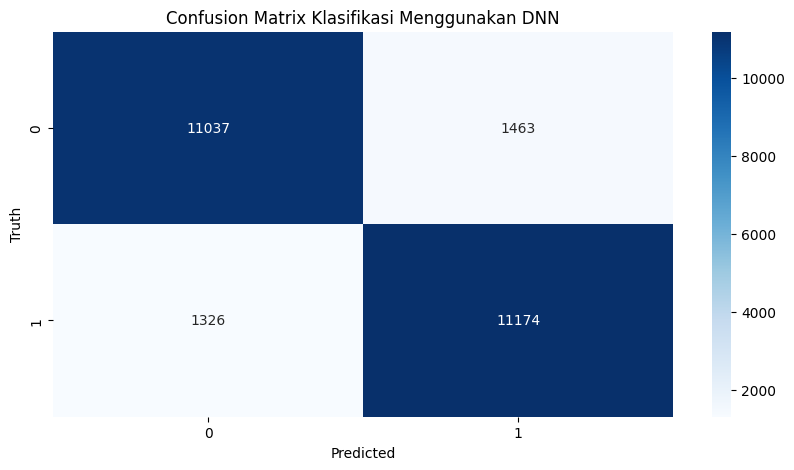

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
plt.title('Confusion Matrix Klasifikasi Menggunakan DNN')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Dari confusion matrix yang kamu tampilkan:

- True Negatives (TN): 11.037 — Model memprediksi kelas 0 dengan benar (label asli juga 0).
- False Positives (FP): 1.463 — Model salah memprediksi kelas 1, padahal label aslinya 0.
- False Negatives (FN): 1.326 — Model salah memprediksi kelas 0, padahal label aslinya 1.
- True Positives (TP): 11.174 — Model memprediksi kelas 1 dengan benar (label asli juga 1).

Kesimpulan:
- Akurasi model adalah sekitar 89%, sesuai dengan yang ditampilkan sebelumnya.
- Presisi dan recall juga seimbang di angka sekitar 88% hingga 89%.


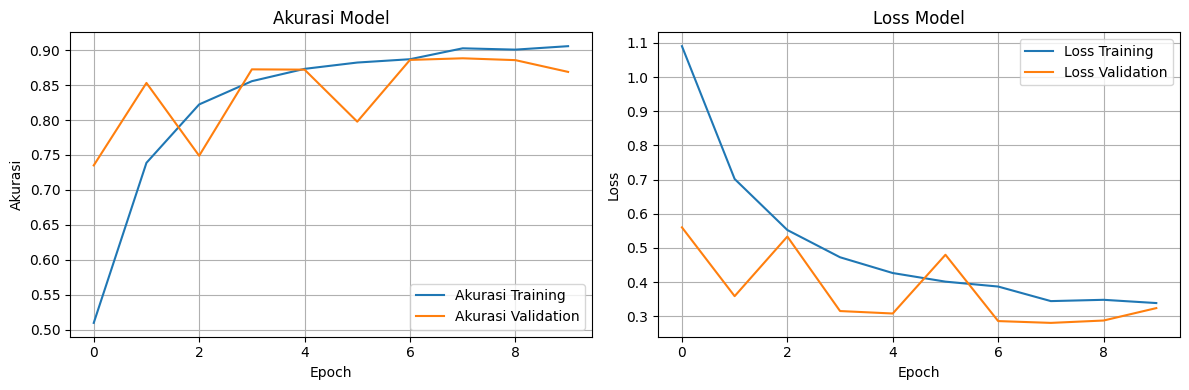

In [66]:
# Step 8: Visualisasi Hasil
# Plot Akurasi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Plot Akurasi Model (Kiri):

- Garis biru (Akurasi Training): Akurasi model pada data pelatihan terus meningkat seiring bertambahnya epoch, mencapai sekitar 90%.
Garis oranye (Akurasi Validasi): Akurasi pada data validasi berfluktuasi, tetapi cenderung mendekati akurasi training. Ini menunjukkan bahwa model tidak mengalami overfitting yang parah karena akurasi validasi cukup konsisten dengan akurasi training.

Plot Loss Model (Kanan):

- Garis biru (Loss Training): Loss pada data pelatihan menurun secara konsisten, menunjukkan model belajar dengan baik.
Garis oranye (Loss Validasi): Loss pada validasi lebih fluktuatif, tetapi juga cenderung menurun, yang merupakan tanda bahwa model melakukan generalisasi yang baik pada data baru.
Kesimpulan:
Model terlihat belajar dengan baik, namun ada sedikit fluktuasi pada data validasi. Meski demikian, tidak ada tanda-tanda overfitting yang jelas, karena akurasi dan loss validasi cenderung mengikuti hasil training.

Kesimpulan:
- Model terlihat belajar dengan baik, namun ada sedikit fluktuasi pada data validasi. Meski demikian, tidak ada tanda-tanda overfitting yang jelas, karena akurasi dan loss validasi cenderung mengikuti hasil training.